In [509]:
import matplotlib.pyplot as plt
from random import uniform, sample, random
import pandas as pd
import seaborn as sns
%matplotlib inline

In [515]:
def sinal(x, y):
    if x*pesos[0] + y*pesos[1] + pesos[2]*1 >= 0:
        return 1
    else:
        return -1

def soma_listas(x, y):
    return [i + k for i, k in zip(x, y)]

def multiplica_valor(valor, x):
    return [valor * i for i in x]

def aprendizado(dados):
    for i, k, j in dados:    
        if sinal(i, k) != j:
            global pesos
            
            pesos = soma_listas(pesos, multiplica_valor(0.2 * (j - sinal(i, k)), [i, k, sinal(i, k)]))
            #print(j, sinal(i, k), 0.2 * (j - sinal(i, k)))
            #print(multiplica_valor(0.2 * (j - sinal(i, k)), [i, k, sinal(i, k)]))
            #print()

def figura(x):
    return -(pesos[0]*x)/pesos[1] - pesos[2]/pesos[0]

def classes(x):
    if x <= 4:
        return 1
    else:
        return -1

In [529]:
classe1 = [(uniform(0, 4), uniform(0, 4), 1) for _ in range(2500)]
classe2 = [(uniform(6, 10), uniform(6, 10), -1) for _ in range(2500)]
dados = classe1 + classe2
dados = sample(dados, len(dados))

X = []
for i in range(250):
    X.append(dados[i][0])

Y = []
for i in range(250):
    Y.append(dados[i][1])

global pesos
pesos = [random(), random(), random()]

(0, 10)

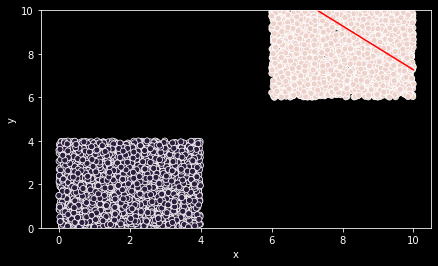

In [530]:
aprendizado(dados)
plt.figure(figsize=(7, 4))
plt.style.use('dark_background')
dtf = pd.DataFrame(dados, columns=['x', 'y', 'classe'])
sns.scatterplot(dtf['x'], dtf['y'], hue = dtf['classe'], legend = False)

x = [i for i in range(11)]
y = [figura(i) for i in x]
plt.plot(x, y, c = 'red')
plt.ylim(0, 10)

In [523]:
dados[:4]

[(8.43682070714872, 7.6232733397133465, -1),
 (9.545261355941296, 6.903550760077005, -1),
 (3.2426060552183635, 2.5244019028033104, 1),
 (9.67185827813472, 8.749383015669297, -1)]

In [479]:
pesos

[67.57239717596137, 67.84412529834864, -1215.6274629173558]